# Introduction

- Built in algorithms

    - select the Algorithm
    - input data
    - hyper parameter
    - compute resources (number and type of compute resources)
    
    - GPU support and parallel run (wintout any additional configurations)

# Built in alogirthms

- start with built in algo
- go to more comples as the complexity of the problem increases

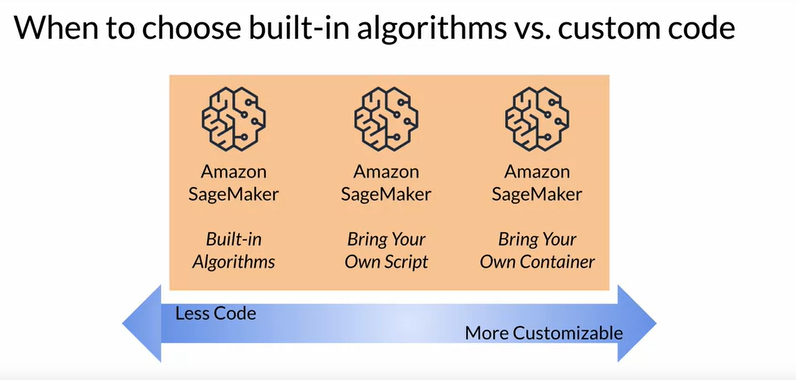

- Docker file (container)

# Use case and Alogorithms

- Supervised 
- Unsupervised
- Image Processing
- Text Analysis

- Classification/Regression problems
    - binary/multi-class
    - built-in alogorithms
        - XGBoost
        - K-Nearest Neighbours
        
- Regression
    - linear learner
        - train many model in parallel, with some slightly diff paramers. It will return the model with the best performance
    - XGBoost
    
- Time series forecasting
    - DeepAR Forecasting
        - RNN
        - One dimentional

- Clustering
    - unsupervised learning
    - feature reduction
    - PCA
    
- Anomaly detection
    - Random Cut Forest (RCF)
    - unsupervised learning
    - anomaly score for each data point. A high score means peresence of an anomaly
    
- Clustering/ Grouping of data
    - K-Means
    - group similar data points tougther
    
- Topic modeling
    - clustering
    - text data
    - algorithms
        - Latent Dirichlet allocation (LDA)
        - Neural Topic Model (NTM)
    - Need to organize text into documents based on words, phrases etc
    
- Content Moderation
    - the content is appropriate to display
    - only for images
    - algorithm
        - ImageClassification
    - two modes
        - fully train
        - transfer learning
        
- Detect People or Objects in the images
    - alogirthm
        - ObjectDetection
    - detects all instances of the object in the image

- Self-driving cars identify objects in their path
    - algorithm
        - Semantic Segmentation
    - classify every pixcel in an image
    - the output is a gray scale image called segmentation mask
    
- Converting spanish to Englist (Text analysis)
    - algorithm
        - sequence to sequence
    - another use case is 
        - summarize text
        - text classification
        - speach to text
        
- Sentiment Analysis
    - BlazingText

# Text analysis

- text analysis / Natural Langurage Processing (NLP)
- Recent evolution
    - Word2Vec (Jan 2013)
        - embedding
        - 300 dim vector space
        
        - Model architecture to create the embeddings
            - continous bag of words (CBOW)
                - surrounding window is used to predict the current word
            - continous skip-gram
                - current workd is used to predict the surrounding window
                
        - out of voccabulary issues
            - the known words (model trained on)
            - 3 million words
            
    - GloVe (Jan 2014)
        - Regression model to lean word representation
        - un-supervised learning
        - 
        
    - FastText (Jul 2016)
        - Facebook
        - built on word2Vec
        - breaks the words into chareterset of length n (n-grams)
        - solves the out of voccabulary (oov) issue
        - eg amazon => 'a', 'am', 'ama', 'amaz', 'amazo', 'amazon'
            - evenif the word amazon is not in the voccabulary, chances are there for the presence of atleast 'a' in the voccabulary
            - the embedding for the word is the aggregate of all the embedding of each n-gram with in the word
        - implementation
            - CBOW (continous bag of words)            
        
    - Trasformer (Jun 2017)
        - paper:- 'attention is all you need' Ashis Vaswani et al., 2017
        - self attention mechanism
        - corelation b/w input and outputs
        
    - BazingText (Nov 2017)
        - AWS
        - word2vec and text classification models
        
    - ELMo(Feb 2018)
        - Embedding from language models
        - deep bi-directional language models
        - better capture syntax and symantics in different lingustic context
     
     - GBT (Jul 2018)
         - OpenAI
         - Generative Pre Training
         - 2 training steps
             - un-supervised learning on a text corpus
             - supervised learning for sepecific task
         - Uni-directional training
         
     - BERT (Oct 2018)
         - Google AI
         - Bi-Directional Encoder Representation from Transformers
         - Bidirectional
             - un-superivised learning; left-to-right
             - context; supervised; right to left
         - many variations on bert
             - diff language
             - diff context
         - most popular NLP model


# Train a text classifier

- Multi-class classification
    - poistive, neutral, or negative
    
- need to change the labels
    
    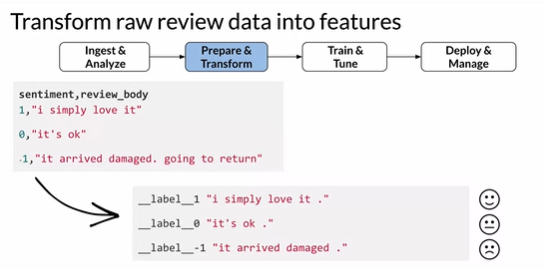

- NLTK package can do this

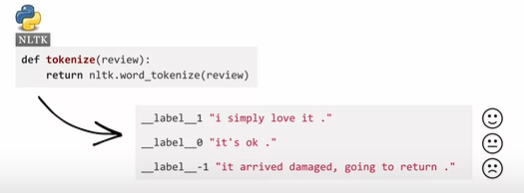

- Hyper parameters
 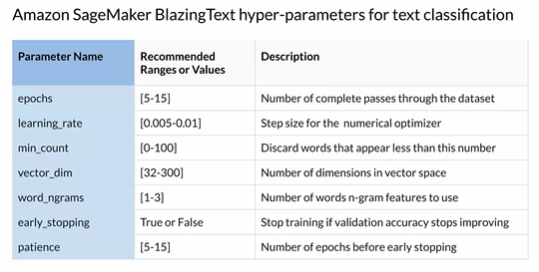
 
 - n-gram has a role in the model accuracy

In [ ]:
# to train
train_data = sagemaker.inputs.TrainingInput(...)
validation_data = sagemaker.inputs.TrainingInputs(...)

data_channels = {
    'train': train_data,
    'validation': validation_data
}

# for training specify the sagemaker training image for BalzingText
image_uri = sagemaker.image_uris.retrieve(framework='blazingtext', ...)

'''
    sagemaker provides prebuild docker images for builtin algorithms
    1. docker container registery (Amazon ECR (elastic container registery))
    2. image_uri.retirieve function will retrieve the docker from the container registry
    
'''

# need to pass the uri with addtitional settings to the sagemaker estimator object
# training can be started by calling estimator.fit method

estimator = sagemaker.estimator.Estimator(image_uri=image_uri, ...)
estimator.set_hyperparameters(...)
estimator.fit(...)
    


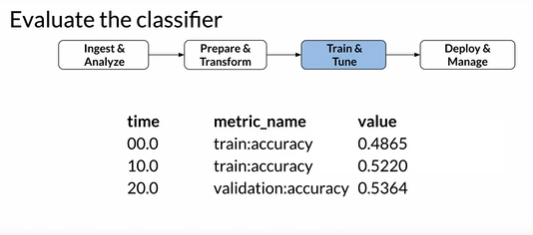

# Deploy the text classifier

- `stimator.deploy` to deploy the model on rest endpoint
    - endpoints are ec2 or elastic compute cloud
    - need to specify
        - instance count
        - instance type
        
- can see the endpoints
    - in sagemeker on the endpoint tab
    
- notebook to endpoint predict call<br>
    `
    payload = {'instances':['this product is great']}
    respose = text_classifer.predict(...)
    `

In [ ]:
text_classifier = estimator.deploy(
    initial_instance_count=1,
    instance_type='ml.m3.xlarge'
)

# predict call from the notebook
payload = {'instances':['this product is great']}
respose = text_classifer.predict(...)
# the payload should be in json
# with instences are product key
# the respose will be a json with the label and the probability score

# Additional reading material

If you wish to dive more deeply into the topics covered this week, feel free to check out these optional references. (You won’t have to read these to complete this week’s practice quizzes.)

- [Word2Vec algorithm](https://arxiv.org/pdf/1301.3781.pdf)
- [GloVe algorithm](https://www.aclweb.org/anthology/D14-1162.pdf)
- [FastText algorithm](https://arxiv.org/pdf/1607.04606v2.pdf)
- [Transformer architecture, "Attention Is All You Need"](https://arxiv.org/abs/1706.03762)
- [BlazingText algorithm](https://dl.acm.org/doi/pdf/10.1145/3146347.3146354)
- [ELMo algorithm](https://arxiv.org/pdf/1802.05365v2.pdf)
- [GPT model architecture](https://cdn.openai.com/research-covers/language-unsupervised/language_understanding_paper.pdf)
- [BERT model architecture](https://arxiv.org/abs/1810.04805)
- [Built-in algorithms](https://docs.aws.amazon.com/sagemaker/latest/dg/algos.html)
- [Amazon SageMaker BlazingText](https://docs.aws.amazon.com/sagemaker/latest/dg/blazingtext.html)